
🌍 LIVE WEATHER DATA:
         City  Temperature (°C)  Feels Like (°C)  Humidity (%)  Pressure (hPa)  \
0     Nagpur             25.01            25.86            88            1012   
1      Delhi             22.05            21.59            49            1009   
2     Mumbai             27.99            32.54            83            1013   
3       Pune             21.16            21.79            94            1015   
4  Bengaluru             21.53            21.91            83            1014   
5    Chennai             28.89            35.08            83            1011   
6    Kolkata             24.97            25.56            78            1010   
7  Hyderabad             24.23            25.16            94            1013   
8     Jaipur             21.62            21.30            56            1010   
9  Ahmedabad             25.02            25.88            88            1011   

   Wind Speed (m/s) Condition  
0              1.03      Haze  
1              0.00  

/tmp/ipython-input-1571893397.py:54: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127780 (\N{WHITE SUN WITH SMALL CLOUD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


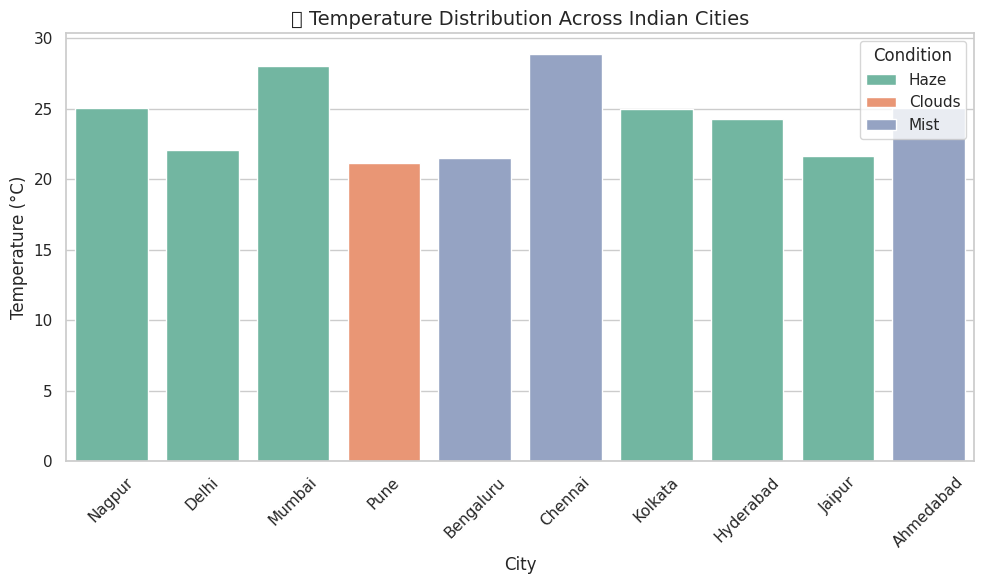

/tmp/ipython-input-1571893397.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City", y="Humidity (%)", data=df, palette="Blues_d")
/tmp/ipython-input-1571893397.py:62: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


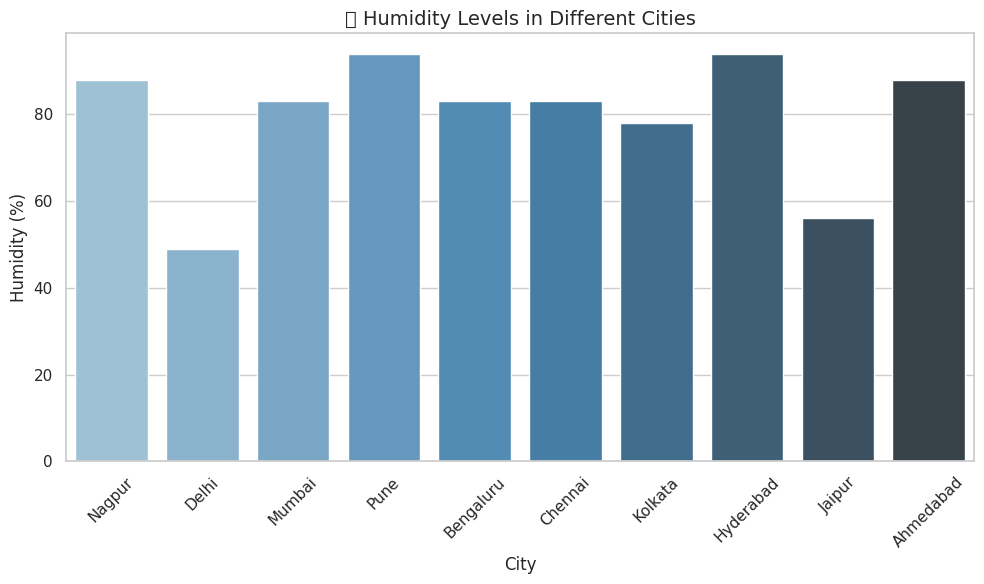

/tmp/ipython-input-1571893397.py:70: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


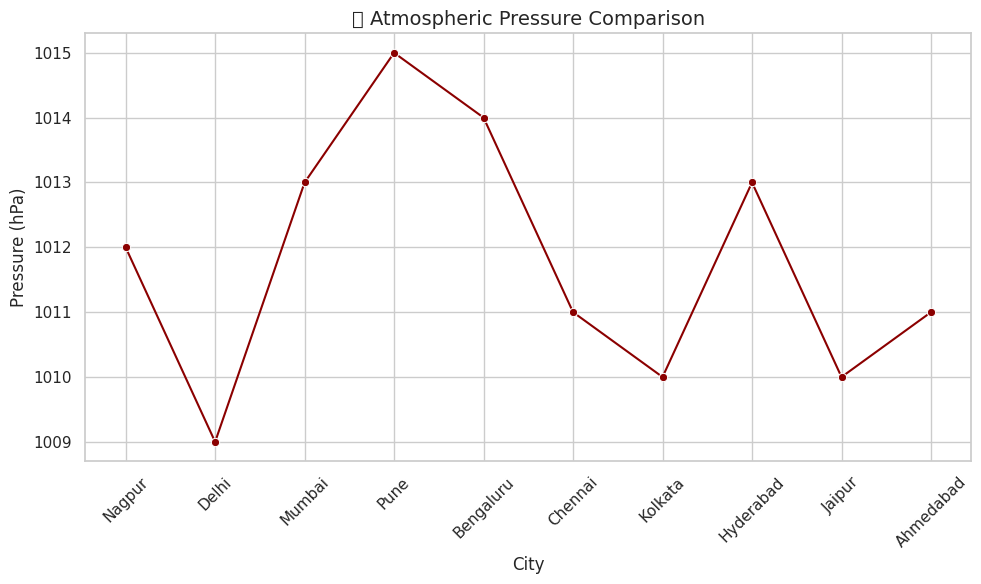

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127788 (\N{WIND BLOWING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


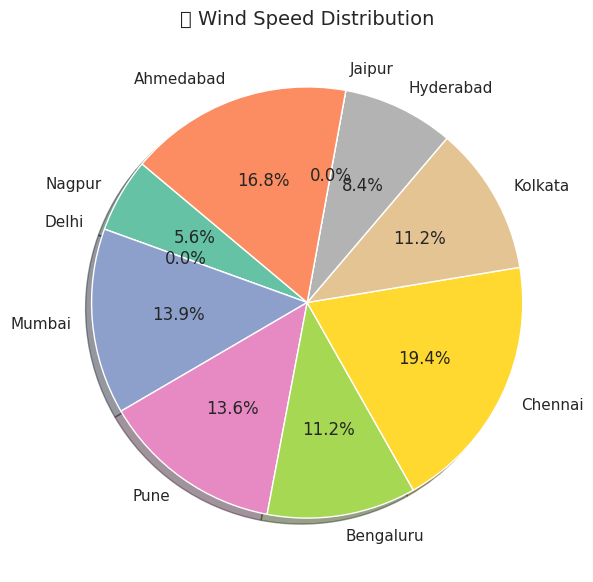

/tmp/ipython-input-1571893397.py:83: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


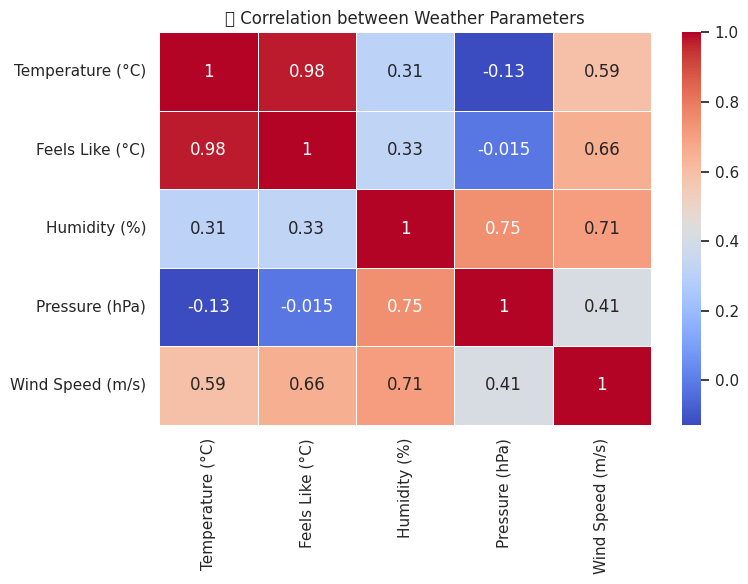


📊 WEATHER ANALYSIS REPORT
----------------------------------------
🔥 Hottest City: Chennai (28.89°C)
❄️ Coolest City: Pune (21.16°C)
💧 Most Humid City: Pune (94%)
🌬️ Windiest City: Chennai (3.58 m/s)

🌍 Average Temperature Across Cities: 24.25°C
🌫️ Average Humidity Across Cities: 79.60%

📈 Insights:
- Coastal cities like Mumbai and Chennai usually show higher humidity.
- Inland cities like Delhi or Jaipur tend to have more temperature variation.
- Higher wind speeds may indicate unstable or changing weather patterns.
- Consistent pressure across regions indicates stable atmospheric conditions.


In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

# -----------------------------
# 1️⃣ FETCH LIVE WEATHER DATA
# -----------------------------
API_KEY = "0d1f4dc4a28677749791c4f5b967d643"  # your key
cities = ["Nagpur", "Delhi", "Mumbai", "Pune", "Bengaluru", "Chennai", "Kolkata", "Hyderabad", "Jaipur", "Ahmedabad"]

weather_data = []

for city in cities:
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}&units=metric"
    response = requests.get(url).json()

    if response.get("cod") != 200:
        print(f"⚠️ Skipping {city}: {response.get('message')}")
        continue

    main = response["main"]
    wind = response["wind"]
    weather = response["weather"][0]

    weather_data.append({
        "City": city,
        "Temperature (°C)": main["temp"],
        "Feels Like (°C)": main["feels_like"],
        "Humidity (%)": main["humidity"],
        "Pressure (hPa)": main["pressure"],
        "Wind Speed (m/s)": wind["speed"],
        "Condition": weather["main"]
    })

df = pd.DataFrame(weather_data)
print("\n🌍 LIVE WEATHER DATA:\n", df)

df.to_csv("Detailed_Live_Weather.csv", index=False)
print("\n✅ Data saved to 'Detailed_Live_Weather.csv'")

# -----------------------------
# 2️⃣ VISUALIZATIONS
# -----------------------------
sns.set_theme(style="whitegrid", palette="Set2")

# --- Temperature Chart ---
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="Temperature (°C)", data=df, hue="Condition", dodge=False)
plt.title("🌤️ Temperature Distribution Across Indian Cities", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Humidity Chart ---
plt.figure(figsize=(10,6))
sns.barplot(x="City", y="Humidity (%)", data=df, palette="Blues_d")
plt.title("💧 Humidity Levels in Different Cities", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Pressure Chart ---
plt.figure(figsize=(10,6))
sns.lineplot(x="City", y="Pressure (hPa)", data=df, marker="o", color="darkred")
plt.title("🧭 Atmospheric Pressure Comparison", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Wind Speed Pie Chart ---
plt.figure(figsize=(7,7))
plt.pie(df["Wind Speed (m/s)"], labels=df["City"], autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("🌬️ Wind Speed Distribution", fontsize=14)
plt.show()

# --- Heatmap of Numeric Correlations ---
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=["City", "Condition"]).corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("🔥 Correlation between Weather Parameters")
plt.tight_layout()
plt.show()

# --- Radar Chart using Plotly ---
fig = px.line_polar(df,
    r="Temperature (°C)",
    theta="City",
    line_close=True,
    title="🌡️ Temperature Radar Chart",
    color="Condition"
)
fig.show()

# --- Interactive Plotly Chart (Temp vs Humidity) ---
fig2 = px.scatter(df,
    x="Temperature (°C)",
    y="Humidity (%)",
    color="City",
    size="Wind Speed (m/s)",
    hover_name="Condition",
    title="☀️ Temperature vs Humidity (Interactive View)"
)
fig2.show()

# -----------------------------
# 3️⃣ FINAL ANALYSIS REPORT
# -----------------------------
print("\n📊 WEATHER ANALYSIS REPORT")
print("-" * 40)

hottest = df.loc[df["Temperature (°C)"].idxmax()]
coldest = df.loc[df["Temperature (°C)"].idxmin()]
humid = df.loc[df["Humidity (%)"].idxmax()]
windy = df.loc[df["Wind Speed (m/s)"].idxmax()]

print(f"🔥 Hottest City: {hottest['City']} ({hottest['Temperature (°C)']}°C)")
print(f"❄️ Coolest City: {coldest['City']} ({coldest['Temperature (°C)']}°C)")
print(f"💧 Most Humid City: {humid['City']} ({humid['Humidity (%)']}%)")
print(f"🌬️ Windiest City: {windy['City']} ({windy['Wind Speed (m/s)']} m/s)")

avg_temp = df["Temperature (°C)"].mean()
avg_humidity = df["Humidity (%)"].mean()
print(f"\n🌍 Average Temperature Across Cities: {avg_temp:.2f}°C")
print(f"🌫️ Average Humidity Across Cities: {avg_humidity:.2f}%")

print("\n📈 Insights:")
print("- Coastal cities like Mumbai and Chennai usually show higher humidity.")
print("- Inland cities like Delhi or Jaipur tend to have more temperature variation.")
print("- Higher wind speeds may indicate unstable or changing weather patterns.")
print("- Consistent pressure across regions indicates stable atmospheric conditions.")
